In [2]:
from __future__ import division, print_function, unicode_literals
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Some Constants

In [3]:
a_0 = 1e-10
me_kg=9.1093837015e-31
h_Js=6.6e-34
hbar_Js=h_Js/(2*np.pi)
eV_over_J=(6.242e+18)

Define the potential strengths alpha to be $\frac{\hbar^2}{ma}$

In [4]:
alpha = pow(hbar_Js,2)/(me_kg*a_0)

Reminder the energy for a single delta potential well of strength $\alpha$

In [5]:
E_single = -pow(hbar_Js,2)/(2*me_kg*pow(a_0,2))*eV_over_J
print(E_single,"eV")

-3.7803578078523494 eV


# To solve double delta potential well need to solve for $z^*$ (See notes)

In [7]:
def LHS(x):
    return x

def Sym(x,c=1):
    return c*(1+np.e**(-2*x))

def ASym(x,c=1):
    return c*(1-np.e**(-2*x))

Plot the solution for $a=1*a_0$

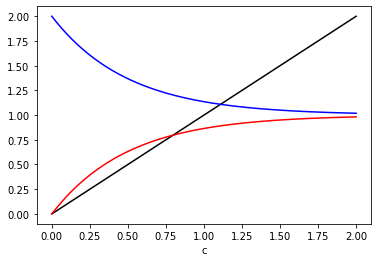

In [8]:
x = np.linspace(0, 2, 500)

plt.plot(x, x,"k")
plt.plot(x, Sym(x),"b")
plt.plot(x, ASym(x),"r")

plt.xlabel("c")
plt.show()

# Function to get the numerical Value

In [9]:
def zStar(c, function, guess = 0.1, iterations=20):
    for i in range(iterations):
        guess = function(guess,c=c)
    return guess    

In [10]:
print("Symmetric Solution",zStar(1,Sym))
print("Asymmetric Solution",zStar(1,ASym))

Symmetric Solution 1.1088575528784383
Asymmetric Solution 0.7968119686575382


# Function to convert from c,zStar to E

In [11]:
def EFromZ(c,z):
    E = -pow(hbar_Js*z,2)/(2*me_kg*pow(c*a_0,2))*eV_over_J
    return E

In [12]:
print("Symmetric Solution: E =",EFromZ(1,zStar(1,Sym)),"eV")
print("ASymmetric Solution: E =",EFromZ(1,zStar(1,ASym)),"eV")


Symmetric Solution: E = -4.648195922373554 eV
ASymmetric Solution: E = -2.4001843801743714 eV


# Function to plot the energy vs c

In [14]:
def ESymm(c):
    z = zStar(c,Sym)
    return EFromZ(c,z)

In [15]:
def EASymm(c):
    z = zStar(c,ASym)
    return EFromZ(c,z)

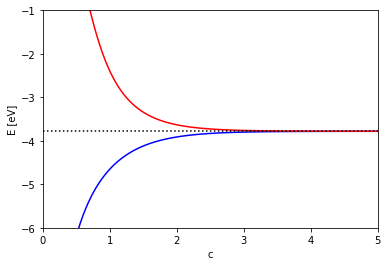

In [16]:
c = np.linspace(0.1, 5, 500)

plt.plot(c, ESymm(c),'b')
plt.plot(c, EASymm(c),'r')
plt.plot([0,5],[E_single,E_single],'k:')
plt.xlabel("c")
plt.ylabel("E [eV]")
plt.axis([0, 5, -6, -1])

plt.show()

# Solutions when c = 1

In [28]:
print(ESymm(c=1))
print(E_single)
print(EASymm(c=1))

-4.648195922373554
-3.7803578078523494
-2.4001843801743714


# Extra Credit

Assume c = 1


In [17]:
E_sym = ESymm(1)
E_sym

-4.648195922373554

In [18]:
def KFromE(E_eV):
    return np.sqrt(-(2*me_kg*(E_eV/eV_over_J))/(hbar_Js*hbar_Js))

In [19]:
#k_symm = sqrt(-2*me_kg*E_sym)
k_symm = KFromE(E_sym)
print(k_symm)



11088575528.784384


In [20]:
def getNormSymm(k):
    den = 2*(np.e**(2*k*a_0)+(1+2*k*a_0))
    return np.sqrt(k*1e-10/den)

In [21]:
def getNormASymm(k):
    den = 2*(np.e**(2*k*a_0)-(1+2*k*a_0))
    return np.sqrt(k*1e-10/den)

In [22]:
def psiSym_1(x):
    E = ESymm(1)
    k = KFromE(E)
    B = getNormSymm(k)
    return B*(np.e**(2*k*a_0)+1)*np.e**(-k*x*1e-10)

In [23]:
def psiASym_1(x):
    E = EASymm(1)
    k = KFromE(E)
    B = getNormASymm(k)
    return B*(np.e**(2*k*a_0)-1)*np.e**(-k*x*1e-10)

In [24]:
def psiSym_2(x):
    E = ESymm(1)
    k = KFromE(E)
    B = getNormSymm(k)
    return B*(np.e**(k*x*1e-10)+np.e**(-k*x*1e-10))

In [25]:
def psiASym_2(x):
    E = EASymm(1)
    k = KFromE(E)
    B = getNormASymm(k)
    return B*(np.e**(k*x*1e-10)-np.e**(-k*x*1e-10))

In [237]:
def psiSym_pos(x):
    psi = psiSym_1(x)
    psi[abs(x)<1] = psiSym_2(x[abs(x)<1])
    return psi

In [238]:
def psiASym_pos(x):
    psi = psiASym_1(x)
    psi[abs(x)<1] = psiASym_2(x[abs(x)<1])
    return psi

In [239]:
def psiSym(x):
    psi = psiSym_pos(x)
    psi[x<0] = psiSym_pos(-x[x<0])
    return psi

In [240]:
def psiASym(x):
    psi = psiASym_pos(x)
    psi[x<0] = -psiASym_pos(-x[x<0])
    return psi

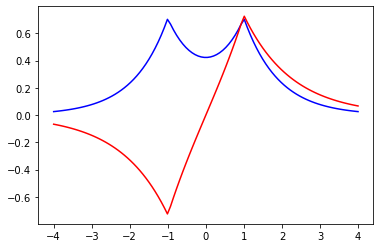

In [243]:
x = np.linspace(-4, 4, 100)

plt.plot(x, psiSym(x),'b')
plt.plot(x, psiASym(x),'r')


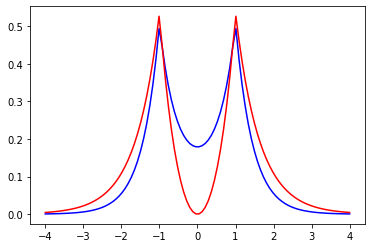

In [244]:
x = np.linspace(-4, 4, 100)

plt.plot(x, psiSym(x)*psiSym(x),'b')
plt.plot(x, psiASym(x)*psiASym(x),'r')

# $\psi_L$

In [249]:
def psi_L(x):
    return 1.0/np.sqrt(2)*(psiSym(x)-psiASym(x))

In [251]:
def psi_R(x):
    return 1.0/np.sqrt(2)*(psiSym(x)+psiASym(x))

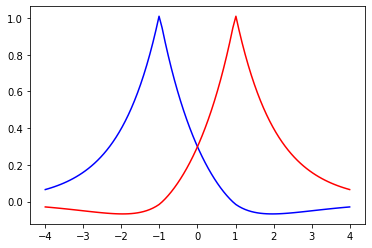

In [252]:
x = np.linspace(-4, 4, 100)

plt.plot(x, psi_L(x),'b')
plt.plot(x, psi_R(x),'r')

#plt.plot(x, psiASym(x)*psiASym(x),'r')

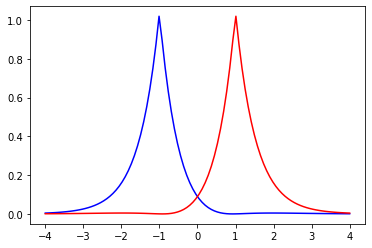

In [257]:
x = np.linspace(-4, 4, 100)

plt.plot(x, psi_L(x)*psi_L(x),'b')
#plt.plot(x, psi_R(x)*psi_R(x),'r')

#plt.plot(x, psiASym(x)*psiASym(x),'r')

In [300]:
def P_L(x,t):
    dE = (EASymm(1)-ESymm(1))/eV_over_J
    P_s = psiSym(x)*psiSym(x)
    P_a = psiASym(x)*psiASym(x)
    P_as = psiASym(x)*psiSym(x)
    #print(dE*t/hbar_Js)
    return 1./2*(P_s+P_a-2*np.cos(dE*t/hbar_Js)*P_as)
    
    

In [331]:
dE = (EASymm(1)-ESymm(1))/eV_over_J
tMax = 2*2*np.pi*hbar_Js/dE
x = np.linspace(-4, 4, 100)
t = np.linspace(0, tMax, 200)
plt.figure(figsize=(20,10))
plt.plot(x, P_L(x,0),'b')
counter = 0
for t_i in t:
    
    plt.plot(x, P_L(x,0),'k:')
    plt.plot(x, P_L(x,t_i),'b')
    plt.plot([-1,-1], [0,0.5],'r:')
    plt.plot([1,1], [0,0.5],'r:')
    plt.xlabel("x / $a_0$")
    plt.ylabel("$|\Psi|^2$") 

    label = str(counter)
    while (len(label) < 3):
        label = "0"+label
    plt.text(-1.5, 1, "$|\Psi(x,0)|^2$", fontsize=20, color='black', horizontalalignment="center")
    plt.savefig("movie/out_"+label+".png")


    #if counter == 0:
    #    break
    plt.clf()


    
    counter += 1

<Figure size 1440x720 with 0 Axes>